In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mattharrison/datasets/master/data/siena2018-pres.csv'
df = pd.read_csv(url)
def tweak_sienna(df):
    def int64_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col: 'uint8' for col in cols}))
    
    return (df
            .rename(columns={'Seq.': 'Seq'})
            .rename(columns={k:v.replace(' ', '_') for k, v in 
                    {'Bg ': ' Background ',
                     'PL ': ' Party leadership ', 
                     'CAb ': ' Communication ability ' ,
                     'RC ': ' Relations with Congress ', 
                     'CAp ': ' Court appointments ' ,
                     'HE ': ' Handling of economy ', 
                     'L ': 'Luck ' ,
                     'AC ': ' Ability to compromise ',
                     'WR ': ' Willing to take risks ' ,
                     'EAp ': ' Executive appointments ', 
                     'OA ': ' Overall ability ' ,
                     'Im ': ' Imagination ', 
                     'DA ': ' Domestic accomplishments ' ,
                     'Int ': ' Integrity ', 
                     'EAb ': ' Executive ability ' ,
                     'FPA ': ' Foreign policy accomplishments ' ,
                     'LA ': ' Leadership ability ',
                     'IQ ': ' Intelligence ', 
                     'AM ': ' Avoid crucial mistakes ' ,
                     'EV ': " Experts ' view ", 
                     'O ': ' Overall '}.items()})
           .astype({'Party': 'category'})
           .pipe(int64_uint8)
           .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8')
                        .sum(axis=1).rank(method='dense').astype('uint8')),
                   Quartile=lambda df_:pd.cut(df_.Average_rank, 4, 
                                              labels='1st 2nd 3rd 4th'.split())))

In [2]:
df = tweak_sienna(df).drop(columns=['Unnamed: 0'])
df.head()

,Seq,President,Party,Bg,Im,Int,IQ,L,WR,AC,...,CAp,HE,EAp,DA,FPA,AM,EV,O,Average_rank,Quartile
0,1,George Washington,Independent,7,7,1,10,1,6,2,...,1,1,1,2,2,1,2,1,1,1st
1,2,John Adams,Federalist,3,13,4,4,24,14,31,...,4,13,15,19,13,16,10,14,12,2nd
2,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,...,7,20,4,6,9,7,5,5,5,1st
3,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,...,6,14,7,11,19,11,8,7,6,1st
4,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,...,11,9,9,10,5,6,9,8,7,1st


### Line plots

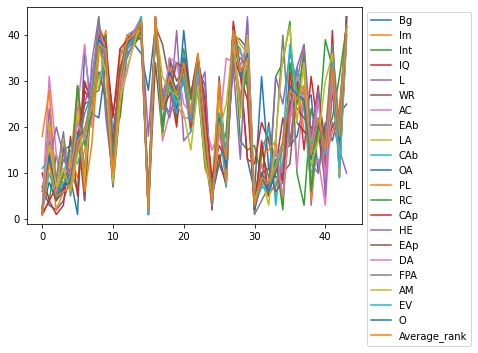

In [5]:
df.plot().legend(bbox_to_anchor=(1, 1))